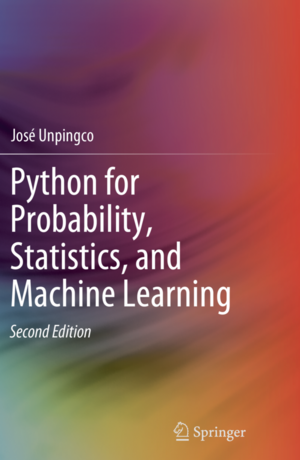

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

<!-- TODO: sklearn.random_projection, sklearn.manifold -->
<!-- TODO: subspace optimization discussion -->


The features from a particular dataset that will ultimately prove important for
machine learning can be difficult to know ahead of time.  This is especially
true for problems that do not have a strong physical underpinning. The
row-dimension of the input matrix ($X$) for fitting data in Scikit-learn is the
number of samples and the column dimension is the number of features. There may
be a large number of column dimensions in this matrix, and the purpose of
dimensionality reduction is to somehow reduce these to only those columns that
are important for the machine learning task.

Fortunately, Scikit-learn provides some powerful tools to help uncover the most
relevant features.  Principal Component Analysis (PCA) consists of taking
the input $X$ matrix and (1) subtracting the mean, (2) computing the covariance
matrix, and (3) computing the eigenvalue decomposition of the covariance
matrix. For example, if $X$ has more columns than is practicable for a
particular learning method, then PCA can reduce the number of columns to a more
manageable number.  PCA is widely used in statistics and other areas beyond
machine learning, so it is worth examining what it does in some detail. First,
we need the decomposition module from Scikit-learn.

In [2]:
from sklearn import decomposition
import numpy as np
pca = decomposition.PCA()

 Let's create some very simple data and apply PCA.

In [3]:
x = np.linspace(-1,1,30)
X = np.c_[x,x+1,x+2] # stack as columns
pca.fit(X)
print(pca.explained_variance_ratio_)

[1.00000000e+00 2.73605815e-32 8.35833807e-34]


**Programming Tip.**

The `np.c_` is a shorcut method for creating stacked column-wise arrays.




 In this example, the columns are just constant offsets of the first
column. The *explained variance ratio* is the percentage of the variance
attributable to the transformed columns of `X`. You can think of this as the
information that is relatively concentrated in each column of the transformed
matrix `X`. [Figure](#fig:pca_001) shows the graph of this dominant
transformed column in the bottom panel.  Note that a constant offset in each of
the columns does not change its respective variance and thus, as far as PCA  is
concerned, the three columns are identical from an information standpoint.

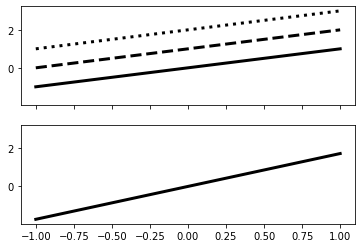

In [4]:
%matplotlib inline

from matplotlib.pylab import subplots
fig,axs = subplots(2,1,sharex=True,sharey=True)
ax = axs[0]
_=ax.plot(x,X[:,0],'-k',lw=3)
_=ax.plot(x,X[:,1],'--k',lw=3)
_=ax.plot(x,X[:,2],':k',lw=3)
ax=axs[1]
_=ax.plot(x,pca.fit_transform(X)[:,0],'-k',lw=3)
#ax.tick_params(labelsize='x-large')
fig.savefig('fig-machine_learning/pca_001.png')

<!-- dom:FIGURE: [fig-machine_learning/pca_001.png, width=500 frac=0.75]  The top panel shows the columns of the feature matrix and the bottom panel shows the dominant component that PCA has extracted.  <div id="fig:pca_001"></div> -->
<!-- begin figure -->
<div id="fig:pca_001"></div>

<p>The top panel shows the columns of the feature matrix and the bottom panel shows the dominant component that PCA has extracted.</p>
<img src="fig-machine_learning/pca_001.png" width=500>

<!-- end figure -->


To make this more interesting, let's change the slope of each of the columns as
in the following,

In [5]:
X = np.c_[x,2*x+1,3*x+2,x] # change slopes of columns
pca.fit(X)
print(pca.explained_variance_ratio_)

[1.00000000e+00 3.26962032e-33 3.78960782e-34 2.55413064e-35]


 However, changing the slope did not impact the explained variance
ratio. Again, there is still only one dominant column. This means that PCA is
invariant to both constant offsets and scale changes. This works for functions
as well as simple lines,

In [6]:
x = np.linspace(-1,1,30)
X = np.c_[np.sin(2*np.pi*x),
          2*np.sin(2*np.pi*x)+1,
          3*np.sin(2*np.pi*x)+2] 
pca.fit(X)
print(pca.explained_variance_ratio_)

[1.00000000e+00 3.70493694e-32 2.51542007e-33]


 Once again, there is only one dominant column, which is shown in the
bottom panel of [Figure](#fig:pca_002). The top panel shows the individual
columns of the feature matrix. To sum up, PCA is able to identify and eliminate
features that are merely linear transformations of existing features. This also
works when there is additive noise in the features, although more samples are
needed to separate the uncorrelated noise from between features.

<!-- dom:FIGURE: [fig-machine_learning/pca_002.png, width=500 frac=0.85] The top panel shows the columns of the feature matrix and the bottom panel shows the dominant component that PCA has computed. <div id="fig:pca_002"></div>  -->
<!-- begin figure -->
<div id="fig:pca_002"></div>

<p>The top panel shows the columns of the feature matrix and the bottom panel shows the dominant component that PCA has computed.</p>
<img src="fig-machine_learning/pca_002.png" width=500>

<!-- end figure -->

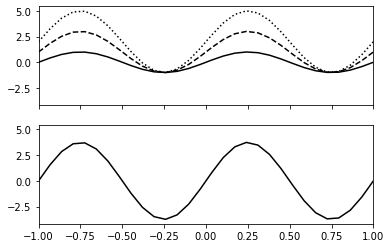

In [7]:
fig,axs = subplots(2,1,sharex=True,sharey=True)
ax = axs[0]
_=ax.plot(x,X[:,0],'-k')
_=ax.plot(x,X[:,1],'--k')
_=ax.plot(x,X[:,2],':k')
ax=axs[1]
_=ax.axis(xmin=-1,xmax=1)
_=ax.plot(x,pca.fit_transform(X)[:,0],'-k')
# ax.tick_params(labelsize='x-large')
fig.savefig('fig-machine_learning/pca_002.png')

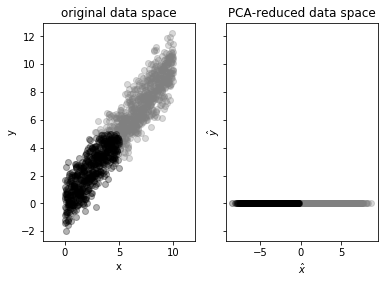

In [8]:
fig,axs=subplots(1,2,sharey=True)
ax=axs[0]
_=ax.axis(xmin=-2,xmax=12)
x1 = np.arange(0, 10, .01/1.2)
x2 = x1+ np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = (x1>5) | (x2>5) 
bad = ~good
_=ax.plot(x1[good],x2[good],'o',alpha=.3,color='gray')
_=ax.plot(x1[bad],x2[bad],'ok',alpha=.3)
_=ax.set_title("original data space")
_=ax.set_xlabel("x")
_=ax.set_ylabel("y")

_=pca.fit(X)
Xx=pca.fit_transform(X)
ax=axs[1]
# ax.set_aspect(1/1.6)
_=ax.plot(Xx[good,0],Xx[good,1]*0,'o',alpha=.3,color='gray')
_=ax.plot(Xx[bad,0],Xx[bad,1]*0,'ok',alpha=.3)
_=ax.set_title("PCA-reduced data space")
_=ax.set_xlabel(r"$\hat{x}$")
_=ax.set_ylabel(r"$\hat{y}$")
fig.savefig('fig-machine_learning/pca_003.png')

To see how PCA can simplify machine learning tasks, consider [Figure](#fig:pca_003) wherein the two classes are separated along the diagonal.
After PCA, the transformed data lie along a single axis where the two classes
can be split using a one-dimensional interval, which greatly simplifies the
classification task. The class identities are preserved under PCA because the
principal component is along the same direction that the classes are separated.
On the other hand, if the classes are separated along the direction
*orthogonal* to the principal component, then the two classes become mixed
under PCA and the classification task becomes much harder. Note that in both
cases, the `explained_variance_ratio_` is the same because the explained
variance ratio does not account for class membership.

<!-- dom:FIGURE: [fig-machine_learning/pca_003.png, width=500 frac=0.85]  The left panel shows the original two-dimensional data space of two easily distinguishable classes and the right panel shows the reduced the data space transformed using PCA. Because the two classes are separated along the principal component discovered by PCA, the classes are  preserved under the transformation.  <div id="fig:pca_003"></div>  -->
<!-- begin figure -->
<div id="fig:pca_003"></div>

<p>The left panel shows the original two-dimensional data space of two easily distinguishable classes and the right panel shows the reduced the data space transformed using PCA. Because the two classes are separated along the principal component discovered by PCA, the classes are  preserved under the transformation.</p>
<img src="fig-machine_learning/pca_003.png" width=500>

<!-- end figure -->

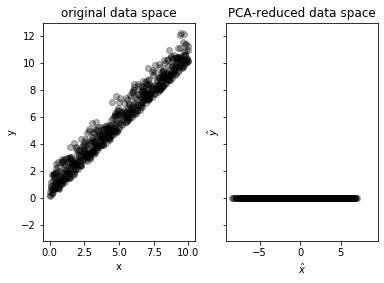

In [9]:

fig,axs=subplots(1,2,sharey=True)
ax=axs[0]
x1 = np.arange(0, 10, .01/1.2)
x2 = x1+np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = x1>x2
bad = ~good 
_=ax.plot(x1[good],x2[good],'ow',alpha=.3)
_=ax.plot(x1[bad],x2[bad],'ok',alpha=.3)
_=ax.set_title("original data space")
_=ax.set_xlabel("x")
_=ax.set_ylabel("y")

_=pca.fit(X)
Xx=pca.fit_transform(X)
ax=axs[1]
_=ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
_=ax.plot(Xx[bad,0],Xx[bad,1]*0,'ok',alpha=.3)
_=ax.set_title("PCA-reduced data space")
_=ax.set_xlabel(r"$\hat{x}$")
_=ax.set_ylabel(r"$\hat{y}$")

fig.savefig('fig-machine_learning/pca_004.png')

<!-- dom:FIGURE: [fig-machine_learning/pca_004.png, width=500 frac=0.85]  As compared with [Figure](#fig:pca_003), the two classes differ along the coordinate direction that is orthogonal to the principal component. As a result, the two classes are no longer distinguishable after transformation. <div id="fig:pca_004"></div>  -->
<!-- begin figure -->
<div id="fig:pca_004"></div>

<p>As compared with [Figure](#fig:pca_003), the two classes differ along the coordinate direction that is orthogonal to the principal component. As a result, the two classes are no longer distinguishable after transformation.</p>
<img src="fig-machine_learning/pca_004.png" width=500>

<!-- end figure -->


PCA works by decomposing the covariance matrix of the data using the Singular
Value Decomposition (SVD). This decomposition exists for all matrices and
returns the following factorization for an arbitrary matrix $\mathbf{A}$,

$$
\mathbf{A} =  \mathbf{U} \mathbf{S}  \mathbf{V}^T
$$

 Because of the symmetry of the covariance matrix, $\mathbf{U} =
\mathbf{V}$. The elements of the diagonal matrix $\mathbf{S}$ are the singular
values of $\mathbf{A}$ whose squares are the eigenvalues of $\mathbf{A}^T
\mathbf{A}$. The eigenvector matrix $\mathbf{U}$ is orthogonal: $\mathbf{U}^T
\mathbf{U} =\mathbf{I}$. The singular values are in decreasing order so that
the first column of $\mathbf{U}$ is the axis corresponding to the largest
singular value. This is the first dominant column that PCA identifies. The
entries of the covariance matrix are of the form $\mathbb{E}(x_i x_j)$ where
$x_i$ and $x_j$ are different features [^covariance]. This means that the
covariance matrix is filled with entries that attempt to uncover mutually
correlated relationships between all pairs of columns of the feature matrix.
Once these have been tabulated in the covariance matrix, the SVD finds optimal
orthogonal transformations to align the components along the directions most
strongly associated with these correlated relationships. Simultaneously,
because orthogonal matrices have columns of unit-length, the SVD collects the
absolute squared lengths of these components into the $\mathbf{S}$ matrix.  In
our example above in [Figure](#fig:pca_003), the two feature vectors were obviously correlated along the
diagonal, meaning that PCA selected that diagonal direction as the principal
component.

[^covariance]: Note that these entries are constructed from the data
using an estimator of the covariance matrix because we do not have
the full probability densities at hand.

We have seen that PCA is a powerful dimension reduction method that is
invariant to linear transformations of the original feature space. However,
this method performs poorly with transformations that are nonlinear. In that
case, there are a wide range of extensions to PCA, such as Kernel PCA, that are
available in Scikit-learn, which allow for embedding parameterized
non-linearities into the PCA at the risk of overfitting.

## Independent Component Analysis

Independent Component Analysis (ICA) via the `FastICA` algorithm is also
available in Scikit-learn. This method is fundamentally different from PCA
in that it is the small differences between components that are emphasized,
not the large principal components.  This method is adopted from signal
processing.  Consider a matrix of signals ($\mathbf{X}$) where the rows are
the samples and the columns are the different signals. For example, these
could be EKG signals from multiple leads on a single patient. The analysis
starts with the following model,

<!-- Equation labels as ordinary links -->
<div id="eq:ICA"></div>

$$
\begin{equation}
\mathbf{X} =  \mathbf{S}\mathbf{A}^T
\label{eq:ICA} \tag{1}
\end{equation}
$$

 In other words, the observed signal matrix is an unknown mixture
($\mathbf{A}$) of some set of conformable, independent random sources
$\mathbf{S}$,

$$
\mathbf{S}=\left[ \mathbf{s}_1(t),\mathbf{s}_2(t),\ldots,\mathbf{s}_n(t)\right]
$$

 The distribution on the random sources is otherwise unknown, except
there can be at most one Gaussian source, otherwise, the mixing matrix
$\mathbf{A}$ cannot be identified because of technical reasons.  The problem in
ICA is to find $\mathbf{A}$ in Equation [1](#eq:ICA) and thereby un-mix the
$s_i(t)$ signals, but this cannot be solved without a strategy to reduce the
inherent arbitrariness in this formulation.  

To make this concrete, let us simulate the situation with the following code,

In [10]:
np.random.seed(123456)

In [11]:
from numpy import matrix, c_, sin, cos, pi
t = np.linspace(0,1,250)
s1 = sin(2*pi*t*6)
s2 =np.maximum(cos(2*pi*t*3),0.3)
s2 = s2 - s2.mean()
s3 = np.random.randn(len(t))*.1
# normalize columns
s1=s1/np.linalg.norm(s1)
s2=s2/np.linalg.norm(s2)
s3=s3/np.linalg.norm(s3)
S =c_[s1,s2,s3] # stack as columns
# mixing matrix
A = matrix([[  1,  1,1],
            [0.5, -1,3],
            [0.1, -2,8]])
X= S*A.T # do mixing

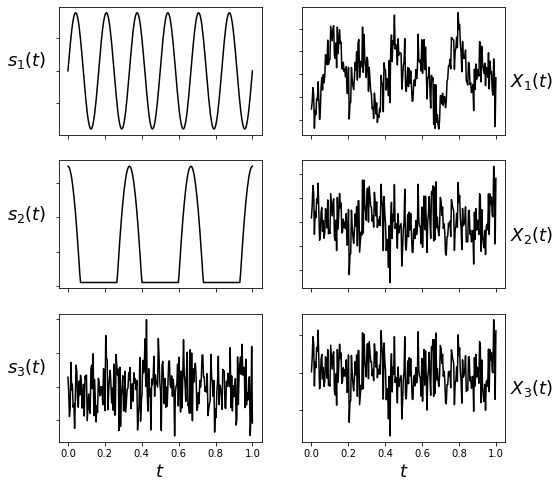

In [12]:
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((8,8))
X = np.array(X)

_=axs[0,1].plot(t,-X[:,0],'k-')
_=axs[1,1].plot(t,-X[:,1],'k-')
_=axs[2,1].plot(t,-X[:,2],'k-')
_=axs[0,0].plot(t,s1,'k-')
_=axs[1,0].plot(t,s2,'k-')
_=axs[2,0].plot(t,s3,'k-')

_=axs[2,0].set_xlabel('$t$',fontsize=18)
_=axs[2,1].set_xlabel('$t$',fontsize=18)
_=axs[0,0].set_ylabel('$s_1(t)$        ',fontsize=18,rotation='horizontal')
_=axs[1,0].set_ylabel('$s_2(t)$        ',fontsize=18,rotation='horizontal')
_=axs[2,0].set_ylabel('$s_3(t)$        ',fontsize=18,rotation='horizontal')
for ax in axs.flatten():
    _=ax.yaxis.set_ticklabels('')

_=axs[0,1].set_ylabel('        $X_1(t)$',fontsize=18,rotation='horizontal')
_=axs[1,1].set_ylabel('        $X_2(t)$',fontsize=18,rotation='horizontal')
_=axs[2,1].set_ylabel('        $X_3(t)$',fontsize=18,rotation='horizontal')
_=axs[0,1].yaxis.set_label_position("right")
_=axs[1,1].yaxis.set_label_position("right")
_=axs[2,1].yaxis.set_label_position("right")

fig.savefig('fig-machine_learning/pca_008.png')

<!-- dom:FIGURE: [fig-machine_learning/pca_008.png, width=500 frac=0.85] The left column shows the original signals and the right column shows the mixed signals. The object of ICA is to recover the left column from the right. <div id="fig:pca_008"></div>  -->
<!-- begin figure -->
<div id="fig:pca_008"></div>

<p>The left column shows the original signals and the right column shows the mixed signals. The object of ICA is to recover the left column from the right.</p>
<img src="fig-machine_learning/pca_008.png" width=500>

<!-- end figure -->


 The individual signals ($s_i(t)$) and their mixtures ($X_i(t)$) are
shown in [Figure](#fig:pca_008). To recover the individual signals using ICA,
we use the `FastICA` object and fit the parameters on the `X` matrix,

In [13]:
from sklearn.decomposition import FastICA
ica = FastICA()
# estimate unknown S matrix
S_=ica.fit_transform(X)

 The results of this estimation are shown in [Figure](#fig:pca_009),
showing that ICA is able to recover the original signals from the observed
mixture. Note that ICA is unable to distinguish the signs of the recovered
signals or preserve the order of the input signals.

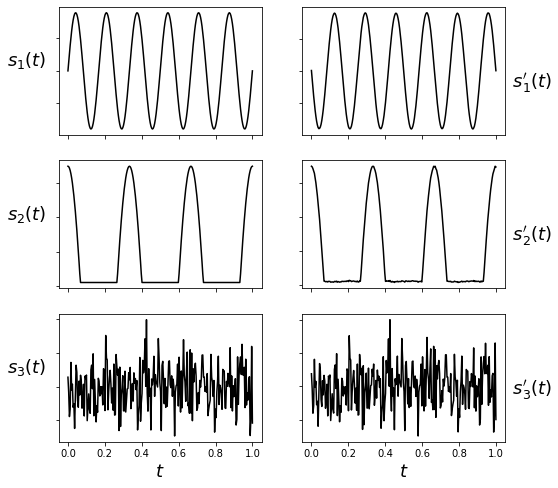

In [14]:
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((8,8))
X = np.array(X)

_=axs[0,1].plot(t,-S_[:,2],'k-')
_=axs[1,1].plot(t,-S_[:,1],'k-')
_=axs[2,1].plot(t,-S_[:,0],'k-')
_=axs[0,0].plot(t,s1,'k-')
_=axs[1,0].plot(t,s2,'k-')
_=axs[2,0].plot(t,s3,'k-')

_=axs[2,0].set_xlabel('$t$',fontsize=18)
_=axs[2,1].set_xlabel('$t$',fontsize=18)
_=axs[0,0].set_ylabel('$s_1(t)$        ',fontsize=18,rotation='horizontal')
_=axs[1,0].set_ylabel('$s_2(t)$        ',fontsize=18,rotation='horizontal')
_=axs[2,0].set_ylabel('$s_3(t)$        ',fontsize=18,rotation='horizontal')
for ax in axs.flatten():
    _=ax.yaxis.set_ticklabels('')

_=axs[0,1].set_ylabel('        $s_1^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[1,1].set_ylabel('        $s_2^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[2,1].set_ylabel('        $s_3^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[0,1].yaxis.set_label_position("right")
_=axs[1,1].yaxis.set_label_position("right")
_=axs[2,1].yaxis.set_label_position("right")

fig.savefig('fig-machine_learning/pca_009.png')

<!-- dom:FIGURE: [fig-machine_learning/pca_009.png, width=500 frac=0.85] The left column shows the original signals and the right column shows the signals that ICA was able to recover. They match exactly, outside of a possible sign change. <div id="fig:pca_009"></div>  -->
<!-- begin figure -->
<div id="fig:pca_009"></div>

<p>The left column shows the original signals and the right column shows the signals that ICA was able to recover. They match exactly, outside of a possible sign change.</p>
<img src="fig-machine_learning/pca_009.png" width=500>

<!-- end figure -->


To develop some intuition as to how ICA accomplishes this feat, consider the
following two-dimensional situation with two uniformly distributed independent
variables, $u_x,u_y \sim \mathcal{U}[0,1]$. Suppose we apply the
following orthogonal rotation matrix to these variables,

$$
\begin{bmatrix}
u_x^\prime \\\
u_y^\prime 
\end{bmatrix}= 
\begin{bmatrix}
\cos(\phi) & -\sin(\phi) \\\
\sin(\phi) & \cos(\phi)
\end{bmatrix}
\begin{bmatrix}
u_x \\\
u_y 
\end{bmatrix}
$$

<!-- dom:FIGURE: [fig-machine_learning/pca_005.png, width=500 frac=0.85] The left panel shows two classes labeled on the $u_x,u_y$ uniformly independent random variables. The right panel shows these random variables after a rotation, which removes their mutual independence and makes it hard to separate the two classes along the coordinate directions. <div id="fig:pca_005"></div>  -->
<!-- begin figure -->
<div id="fig:pca_005"></div>

<p>The left panel shows two classes labeled on the $u_x,u_y$ uniformly independent random variables. The right panel shows these random variables after a rotation, which removes their mutual independence and makes it hard to separate the two classes along the coordinate directions.</p>
<img src="fig-machine_learning/pca_005.png" width=500>

<!-- end figure -->


 The so-rotated variables $u_x^\prime,u_y^\prime$ are no longer
independent, as shown in [Figure](#fig:pca_005). Thus, one way to think about
ICA is as a search through orthogonal matrices so that the independence is
restored. This is where the prohibition against Gaussian distributions arises.
The two dimensional Gaussian distribution of independent variables is
proportional the following,

$$
f(\mathbf{x})\propto\exp(-\frac{1}{2}\mathbf{x}^T \mathbf{x})
$$

 Now, if we similarly rotated the $\mathbf{x}$ vector as,

$$
\mathbf{y} = \mathbf{Q} \mathbf{x}
$$

 the resulting density for $\mathbf{y}$ is obtained by plugging in
the following,

$$
\mathbf{x} = \mathbf{Q}^T \mathbf{y}
$$

 because the inverse of an orthogonal matrix is its transpose, we obtain

$$
f(\mathbf{y})\propto\exp(-\frac{1}{2}\mathbf{y}^T \mathbf{Q}\mathbf{Q}^T \mathbf{y})=\exp(-\frac{1}{2}\mathbf{y}^T \mathbf{y})
$$

 In other words, the transformation is lost on the $\mathbf{y}$
 variable. This means that ICA cannot search over orthogonal transformations if
 it is blind to them, which explains the restriction of Gaussian random
 variables. Thus, ICA is a method that seeks to maximize the non-Gaussian-ness
 of the transformed random variables.  There are many methods to doing this,
 some of which involve cumulants and others that use the
*negentropy*,

$$
\mathcal{J}(Y) = \mathcal{H}(Z)-\mathcal{H}(Y)
$$

 where $\mathcal{H}(Z)$ is the information entropy of the
Gaussian random variable $Z$ that has the same variance as $Y$. Further
details would take us beyond our scope, but that is the outline of how
the FastICA algorithm works.

The implementation of this method in Scikit-learn includes two different ways
of extracting more than one independent source component. The *deflation*
method iteratively extracts one component at a time using a incremental
normalization step. The *parallel* method also uses the single-component method
but carries out normalization of all the components simultaneously, instead of
for just the newly computed component.  Because ICA extracts
independent components, a whitening step is used beforehand to balance the
correlated components from the data matrix. Whereas PCA returns
uncorrelated components along dimensions optimal for Gaussian random
variables, ICA returns components that are as far from the Gaussian density
as possible.

The left panel on [Figure](#fig:pca_005) shows the orignal uniform random
sources. The white and black colors distinguish between two classes. The right
panel shows the mixture of these sources, which is what we observe as input
features. The top row of [Figure](#fig:pca_006) shows the PCA (left) and ICA
(right) transformed data spaces.  Notice that ICA is able to un-mix the two
random sources whereas PCA transforms along the dominant diagonal. Because ICA
is able to preserve the class membership, the data space can be reduced to two
non-overlapping sections, as shown. However, PCA cannot achieve a similiar
separation because the classes are mixed along the dominant diagonal that PCA
favors as the main component in the decomposition. 

<!-- dom:FIGURE: [fig-machine_learning/pca_006.png, width=500 frac=0.85]  The panel on the top left shows two classes in a plane after a  rotation. The bottom left panel shows the result of dimensionality reduction using PCA, which causes mixing between the two classes. The top right panel shows the ICA transformed output and the lower right panel shows that, because ICA was able to un-rotate the data, the lower dimensional data maintains the separation between the classes. <div id="fig:pca_006"></div>  -->
<!-- begin figure -->
<div id="fig:pca_006"></div>

<p>The panel on the top left shows two classes in a plane after a  rotation. The bottom left panel shows the result of dimensionality reduction using PCA, which causes mixing between the two classes. The top right panel shows the ICA transformed output and the lower right panel shows that, because ICA was able to un-rotate the data, the lower dimensional data maintains the separation between the classes.</p>
<img src="fig-machine_learning/pca_006.png" width=500>

<!-- end figure -->


For a good principal component analysis treatment, see  [[richert2013building]](#richert2013building),
[[alpaydin2014introduction]](#alpaydin2014introduction), [[cuesta2013practical]](#cuesta2013practical), and
[[izenman2008modern]](#izenman2008modern). Independent Component Analysis is discussed in more detail
in [[hyvarinen2004independent]](#hyvarinen2004independent).

<!-- #  *Learning from Data*, p. 263 -->
<!-- #  *Building machine learning systems*, p.231 -->
<!-- #  *Introduction to machine learning by Alpaydin*, p148 -->
<!-- #  *Practical Data Analysis Cuesta*,p.143 -->
<!-- #  *Modern Multivariate statistical techniques Izenman*, p.553, 558 -->
<!-- #  *Independent Component Analysis Hyvarinen.pdf*, p.147 -->